***
# Car sales analysis
***

1. **Évolution des ventes (scatter plot)**
    - Totales
    - VÉ vs VCI <br> <br>
2. **Analyse des caractéristiques des acheteurs de VÉ pour les années train (2017-2018)**
    - Variables quantitatives (masse, age)
    - Variables qualitative (région, ville)
***

In [2]:
# Create folders and getting path
import os
cwd = os.getcwd()

# Loop to create folders
folder_names = ['Dataframe', 'Output', 'Data']

folders = {}
for folder_name in folder_names:
    folders[folder_name] = os.path.join(cwd, folder_name)

    if not os.path.exists(os.path.join(cwd, folder_name)):
        os.makedirs(os.path.join(cwd, folder_name))
        print(f'Le dossier « {folder_name} » a été créé')

    else:
        print(f'Le dossier « {folder_name} » est existant')


# Création des variables de path

# Déterminer si os est win ou linux pour définir les path
if os.name == 'nt':
    slash = '\\'
elif os.name == 'posix':
    slash = '/'

path_prog =     cwd + slash
path_data =     folders['Data'] + slash
path_df =       folders['Dataframe'] + slash
path_output =   folders['Output'] + slash

# Mettre \\ pour éviter les erreurs
path_dict = [path_prog, path_data, path_df, path_output]
for path in path_dict:
    path = path.replace('\\','\\\\')


# Détermination de l'année
print()
print(path_prog)
print(path_data)
print(path_df)
print(path_output)

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Output\


In [30]:
pd.set_option('display.max_columns', None)

import pandas as pd
df_unique = pd.read_hdf(path_df + 'df_unique.h5')
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6


In [ ]:
# Nombre de vente par type de carburant

# Nombre de vente par région

# prix moy

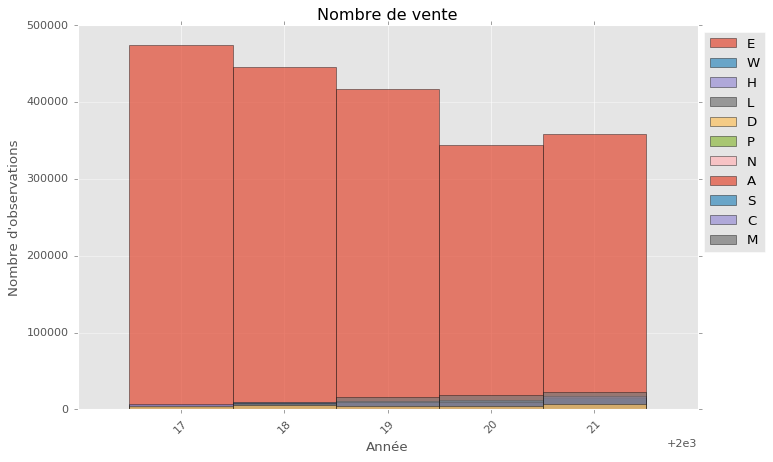

In [70]:
import matplotlib.pyplot as plt

# Calculate the range for the x-axis
min_year = min(df_unique['AN'])
max_year = max(df_unique['AN'])

# Calculate the number of bins based on the range
nb_bins = max_year - min_year + 1

plt.figure(figsize=(10, 6))

# Create a list of unique values in the 'TYPE_CARBU' column
carbu_types = df_unique['TYP_CARBU'].unique()

# Iterate through carbu types and stack the bars
for carbu_type in carbu_types:
    data_subset = df_unique[df_unique['TYP_CARBU'] == carbu_type]
    
    # Reduce the width of the bars by setting the width parameter
    plt.hist(data_subset['AN'], bins=nb_bins, edgecolor='k', align='mid', range=(min_year - 0.5, max_year + 0.5), label=carbu_type, alpha=0.7, width=1)

plt.title('Nombre de vente')
plt.xlabel('Année')
plt.ylabel('Nombre d\'observations')
plt.xticks(range(min_year, max_year + 1), rotation=45)  # Set x-axis ticks for full years

# Move the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()



In [52]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


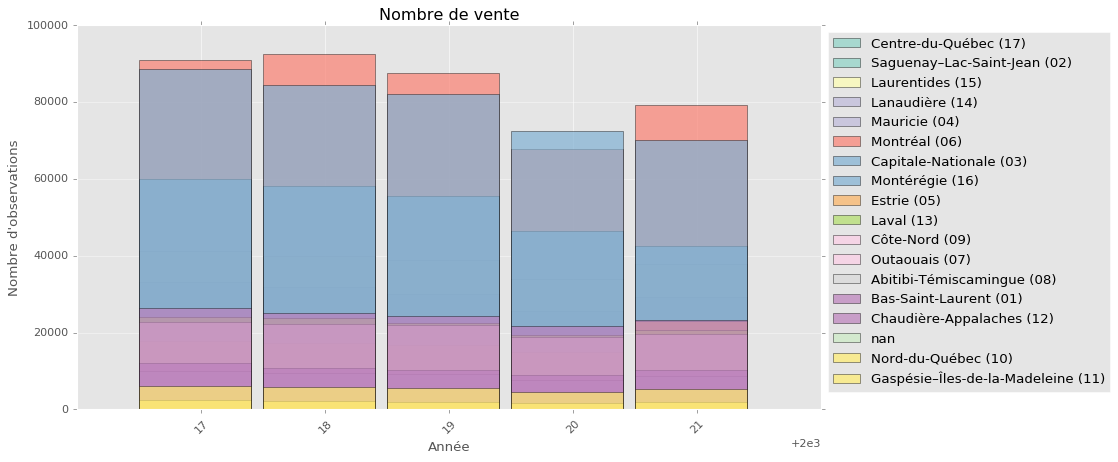

In [67]:
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Calculate the range for the x-axis
min_year = min(df_unique['AN'])
max_year = max(df_unique['AN'])

# Define the desired bin edges to center the bars
bin_edges = [i - 0.5 for i in range(min_year, max_year + 2)]

# Define a list of distinctive colors from the 'Set3' color map
colors = plt.cm.Set3(np.linspace(0, 1, len(df_unique['REG_ADM'].unique())))

plt.figure(figsize=(12, 6))

# Create a list of unique values in the 'TYPE_CARBU' column
carbu_types = df_unique['REG_ADM'].unique()

# Iterate through carbu types and stack the bars with distinctive colors
color_cycle = cycle(colors)
for carbu_type in carbu_types:
    data_subset = df_unique[df_unique['REG_ADM'] == carbu_type]
    
    # Reduce the width of the bars by setting the width parameter and specify color
    color = next(color_cycle)
    plt.hist(data_subset['AN'], bins=bin_edges, edgecolor='k', align='mid', range=(min_year - 0.5, max_year + 0.5), label=carbu_type, alpha=0.7, width=0.9, color=color)

plt.title('Nombre de vente par région administrative')
plt.xlabel('Année')
plt.ylabel("Nombre d'observations")
plt.xticks(range(min_year, max_year + 1), rotation=45)  # Set x-axis ticks for full years

# Move the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()
